In [1]:
import numpy as np
from os.path import join
import matplotlib.pyplot as plt

from flyeye.data.experiments import Experiment

from figures.dynamics import Expression    
from figures.comparison import DosingComparison
from figures.clones import CloneComparison

%matplotlib inline

data_path = '../data/published'

# Load dosage experiment data

In [2]:
pnt1x = Experiment(join(data_path, 'pntgfp_dosing', '1xPntGFP'), normalization='ch2')
pnt2x = Experiment(join(data_path, 'pntgfp_dosing', '2xPntGFP'), normalization='ch2')

# add P/Y ratio to cell data
pnt1x.set_ratio('ch1_normalized', 'ch0_normalized')
pnt2x.set_ratio('ch1_normalized', 'ch0_normalized')

# Figure 4 A-D

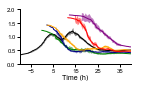

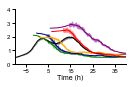

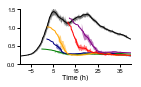

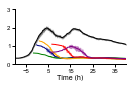

In [3]:
# define cell types
neurons = [['r8'],['r2','r5'],['r3','r4'],['r1','r6'],['r7']]

# define number of bootstrap samples (10k used for manuscript)
interval_kw = dict(nbootstraps=10) 

# Fig 4A (Pnt levels, 1x PntGFP)
fig = Expression(pnt1x)
ax_kw = dict(xlim=(-10, 40), ylim=(0, 2), yticks=np.arange(0, 2.1, .5))
fig.render('ch1_normalized', neurons, interval=True, ax_kw=ax_kw, interval_kw=interval_kw)

# Fig 4B (Pnt levels, 2x PntGFP)
fig = Expression(pnt2x)
ax_kw = dict(xlim=(-10, 40), ylim=(0, 4), yticks=np.arange(0, 4.1, 1.))
fig.render('ch1_normalized', neurons, interval=True, ax_kw=ax_kw, interval_kw=interval_kw)

# Fig 4C (Yan levels, 1x PntGFP)
fig = Expression(pnt1x)
ax_kw = dict(xlim=(-10, 40), ylim=(0, 1.5), yticks=np.arange(0, 1.6, .5))
fig.render('ch0_normalized', neurons, interval=True, ax_kw=ax_kw, interval_kw=interval_kw)

# Fig 4D (Yan levels, 2x PntGFP)
fig = Expression(pnt2x)
ax_kw = dict(xlim=(-10, 40), ylim=(0, 3), yticks=np.arange(0, 3.1, 1.))
fig.render('ch0_normalized', neurons, interval=True, ax_kw=ax_kw, interval_kw=interval_kw)

# Figure 4E

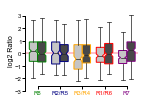

In [5]:
fig = DosingComparison.from_experiment(pnt1x, pnt2x)
fig.render(channel='logratio')

In [6]:
fig.get_statistics()

,log10 pval
R1/R6,-0.96
R2/R5,-0.31
R3/R4,-3.05
R7,-9.68
R8,-0.44


# Figure 4H

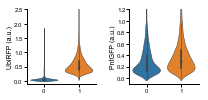

In [4]:
comparison = CloneComparison.from_flyqma(join(data_path, 'clones', 'yanE833'))
comparison.render()

In [10]:
print('UbiRFP level, p={:0.5f}'.format(comparison.ch2_pvalue))
print('Pnt-GFP level, p={:0.5f}'.format(comparison.ch1c_pvalue))

UbiRFP level, p=0.00000
Pnt-GFP level, p=0.00000
